## Let's solve a classification problem on kaggle 

**problem :** [StumbleUpon Evergreen Classification Challenge]("https://www.kaggle.com/c/stumbleupon/overview")

## Import Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import json

## Data Loading : 

In [368]:
data_train = pd.read_csv('train.tsv', sep='\t')
data_test = pd.read_csv('test.tsv', sep='\t')

data_train.sample(2).T

,5016,5623
url,http://www.greatist.com/recipes/,http://www.whowhatwear.com/beauty/
urlid,4540,920
boilerplate,"{""url"":""greatist recipes"",""title"":""Greatist Yo...","{""url"":""whowhatwear beauty"",""title"":""Beauty an..."
alchemy_category,?,arts_entertainment
alchemy_category_score,?,0.867307
avglinksize,1.14881,2.020115
commonlinkratio_1,0.331395,0.546448
commonlinkratio_2,0.19186,0.251366
commonlinkratio_3,0.005814,0.163934
commonlinkratio_4,0.0,0.092896


## Data Exploration and cleaning :

In [369]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Column Summary :

In [370]:
def print_column_summay(data):
    n , _ = data.shape
    name = []
    dtype = []
    unique_values_conut = []
    missing_value = []
    for column in data.columns:
        # print(column) 
        name.append(column)
        # print(str(data[column].dtype))
        data_type = str(data[column].dtype)
        dtype.append(str(data[column].dtype))
        if(data_type=="float64"):
            unique_values_conut.append("")
        else:
            unique_values_conut.append(str(data[column].nunique()))  
        missing_value.append(f" {round(data[column].isnull().sum() / n,2)*100} %")
    
    summary = {
        "Name":name,
        "Type":dtype,
        "Unique Values count":unique_values_conut,
        "Missing Values":missing_value
    }
    summary_table = pd.DataFrame(summary)
    return summary_table

print_column_summay(data_train)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### Duplicated Values :

In [371]:
print("Number of Duplicated Values : ",data_train.duplicated().sum())

Number of Duplicated Values :  0


## Feature Engineering and EDA

### **boilerplate :**

In [372]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data_train.iloc[i].boilerplate)


189 {"title":"Pumpkin Pie Croissants Sandy a la Mode ","body":"Posted 11 09 2011 by Sandy a la Mode in The Dish 36 comments Recently in my hunt for the perfect ways to use up my pumpkin I found this amazingly simple and delicious recipe on Pressed Down Shaken Together that uses pumpkin and crescent rolls Now I have to say that it s been awhile since I ve bought said crescent rolls don t know why and since I always love to mix up what I eat I decided to give it a shot Boy was this delicious seriously y all you ve got to try it It s flaky sweet tasty flavorful and mmmm just feels right with a glass of milk or some hot tea So get your ingredients ready and LET S BAKE Pumpkin Pie Croissants recipe from here Ingredients 2 tubes of refrigerated crescent rolls 1 2 block of cream cheese 1 cup canned pumpkin 1 1 2 tsp pumpkin pie spice 1 tbsp pumpkin pie spice 3 tbsp sugar 4 tbsp sugar Directions 1 Preheat oven to 375 degrees 2 Roll each crescent roll out and cut each lengthwise by 2 3 Mix toge

In [373]:
def extract_title_body_length(data):
    boilerplatedf = data["boilerplate"].apply(json.loads)
    boilerplatedf = pd.DataFrame(boilerplatedf.tolist())
    data['boilerplate_title'] = boilerplatedf['title'].fillna('')
    data['boilerplate_body'] = boilerplatedf['body'].fillna('')
    data['boilerplate_title_length'] = data['boilerplate_title'].apply(len)
    data['boilerplate_body_length'] = data['boilerplate_body'].apply(len)
    return data

data_train = extract_title_body_length(data_train)
data_test = extract_title_body_length(data_test)

<Axes: title={'center': 'Average Boilerplate title Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

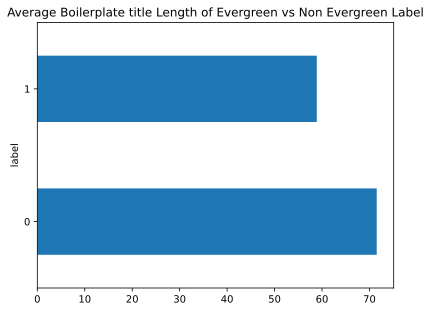

In [374]:
data_train.groupby("label")["boilerplate_title_length"].mean().plot(kind='barh',title="Average Boilerplate title Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Average Boilerplate body Length of Evergreen vs Non Evergreen'}, ylabel='label'>

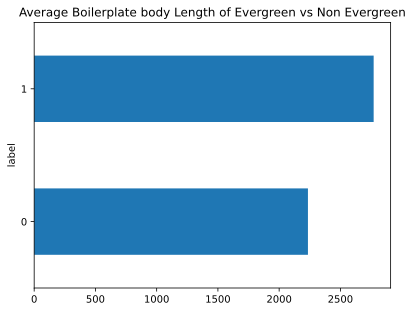

In [375]:
data_train.groupby("label")["boilerplate_body_length"].mean().plot(kind='barh',title="Average Boilerplate body Length of Evergreen vs Non Evergreen")

### **alchemy category**:

In [376]:
data_train['alchemy_category'].value_counts().to_frame().style.background_gradient()

,count
alchemy_category,
?,2342
recreation,1229
arts_entertainment,941
business,880
health,506
sports,380
culture_politics,343
computer_internet,296
science_technology,289


In [377]:
data_train.groupby("alchemy_category")["label"].mean().sort_values().to_frame().style.background_gradient()

,label
alchemy_category,
weather,0.000000
sports,0.205263
computer_internet,0.246622
unknown,0.333333
gaming,0.368421
arts_entertainment,0.371945
religion,0.416667
law_crime,0.419355
science_technology,0.456747


In [378]:
data_train.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


### **is news & news_front_page :**

In [379]:
data_train['is_news'] = data_train['is_news'].str.replace("?", "0").astype(int)
data_test['is_news'] = data_test['is_news'].str.replace("?", "0").astype(int)

data_train['news_front_page'] = data_train['news_front_page'].str.replace("?", "0").astype(int)
data_test['news_front_page'] = data_test['news_front_page'].str.replace("?", "0").astype(int)

In [380]:
data_train['is_news'].value_counts().to_frame()

,count
is_news,
1,4552
0,2843


In [381]:
data_train['news_front_page'].value_counts().to_frame()

,count
news_front_page,
0,7101
1,294


In [382]:
droped_columns = ['boilerplate', 'url', 'boilerplate_body', 'boilerplate_title', 'urlid', 'alchemy_category_score']
data_test_ft = data_test.copy()
data_train.drop(columns=droped_columns, inplace=True)
data_test.drop(columns=droped_columns, inplace=True)

In [383]:
numeric_data = data_train.select_dtypes(include=["number"])
numeric_data.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,boilerplate_title_length,boilerplate_body_length
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,NaN,-0.049270,-0.002046,...,0.122550,-0.015670,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172,-0.019468,0.016601
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,NaN,-0.294860,0.006790,...,0.257200,0.026324,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364,0.036185,0.117733
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,NaN,-0.259222,0.000263,...,0.257594,0.047111,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488,0.007181,0.124200
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,NaN,-0.218559,-0.031097,...,0.109654,0.040057,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964,-0.044878,0.136849
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,NaN,-0.178064,-0.052519,...,0.059223,0.041393,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464,-0.038163,0.116602
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,NaN,0.159335,0.027657,...,0.146470,-0.014765,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737,-0.318022,-0.244643
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,NaN,-0.130753,-0.026473,...,-0.108476,0.008855,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536,0.292144,0.230184
framebased,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,NaN,1.000000,0.010193,...,0.158874,-0.085953,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762,0.025708,-0.190246
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,NaN,0.010193,1.000000,...,0.022583,-0.025167,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863,0.007011,-0.019640


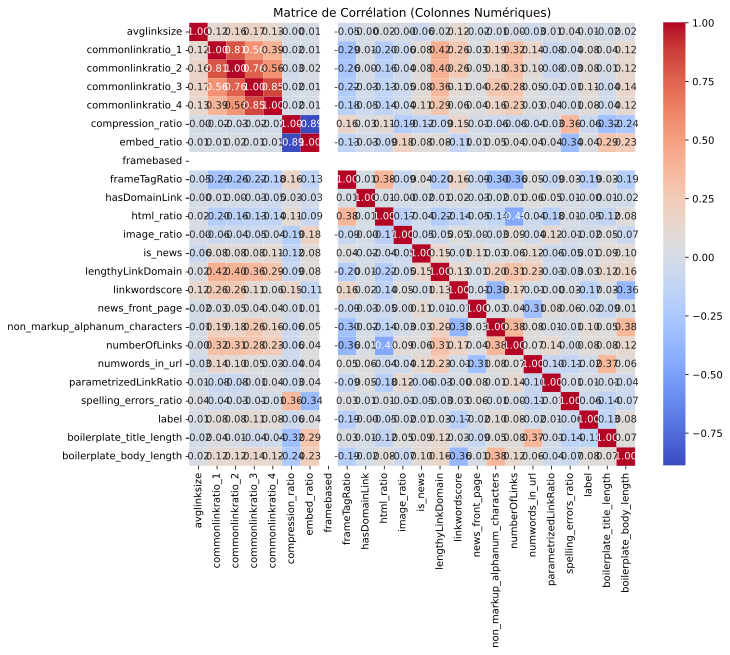

In [384]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation (Colonnes Numériques)")
plt.show()

## Modeling : 

In [385]:
categorical_columns = data_train.select_dtypes(include=["object"]).columns
numeric_columns = data_train.select_dtypes(include=["number"]).columns.drop('label')

# Apply OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)


X_train_full = data_train.drop(columns=['label'])
y_train_full = data_train['label']

In [386]:
X_train_preprocessed = preprocessor.fit_transform(X_train_full)
X_test_full = data_test
X_test_preprocessed = preprocessor.transform(X_test_full)

In [387]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_full, test_size=0.2, random_state=42)

LogisticRegression()

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate_models(X_train,X_val,y_train,y_val):
    # Define models 
    models = {
        "Logistic Regression":LogisticRegression(),
        "RandomForest":RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN":KNeighborsClassifier(n_neighbors=5),
        "SVC":SVC(kernel='linear', random_state=42)
    }
    results = []
    for name , model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val,y_pred)
        precision = precision_score(y_val,y_pred)
        recall= recall_score(y_val,y_pred)
        f1 = f1_score(y_val,y_pred)
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })
    return pd.DataFrame(results)
    
train_and_evaluate_models(X_train,X_val,y_train,y_val)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.664638,0.655980,0.710280,0.682051
1,RandomForest,0.698445,0.707250,0.690254,0.698649
2,KNN,0.667343,0.652794,0.732977,0.690566
3,SVC,0.670047,0.654438,0.738318,0.693852


In [397]:
# Train Logistic Regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [398]:
y_val_pred = model.predict(X_val)
print("Validation Performance:\n", classification_report(y_val, y_val_pred))

Validation Performance:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       730
           1       0.71      0.69      0.70       749

    accuracy                           0.70      1479
   macro avg       0.70      0.70      0.70      1479
weighted avg       0.70      0.70      0.70      1479



In [399]:
y_test_pred = model.predict(X_test_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'urlid': data_test_ft['urlid'],  # Assuming test.csv contains a 'urlid' column
    'label': y_test_pred
})


In [401]:
submission.to_csv("submission.csv",index=False)